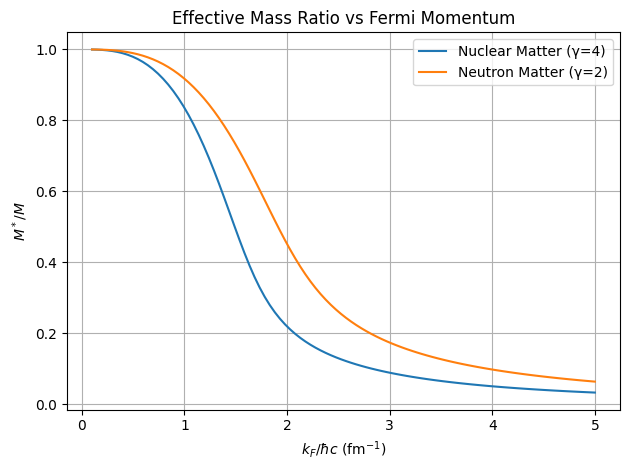

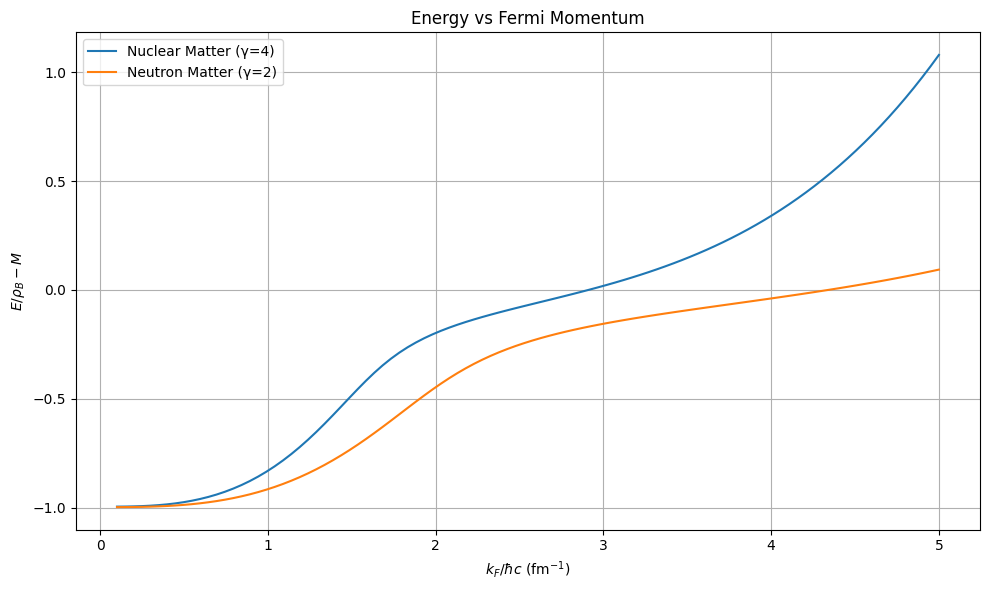

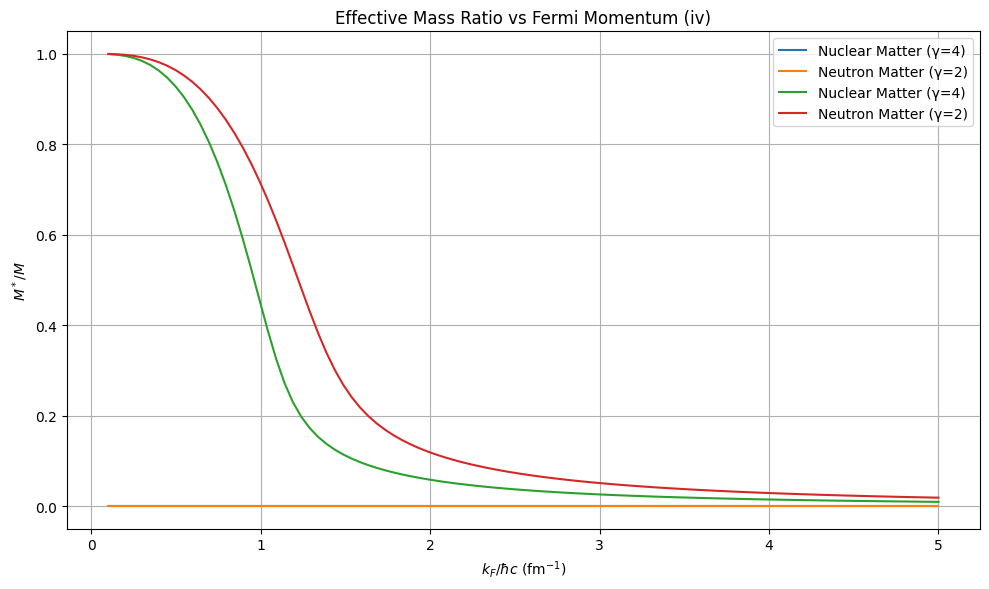

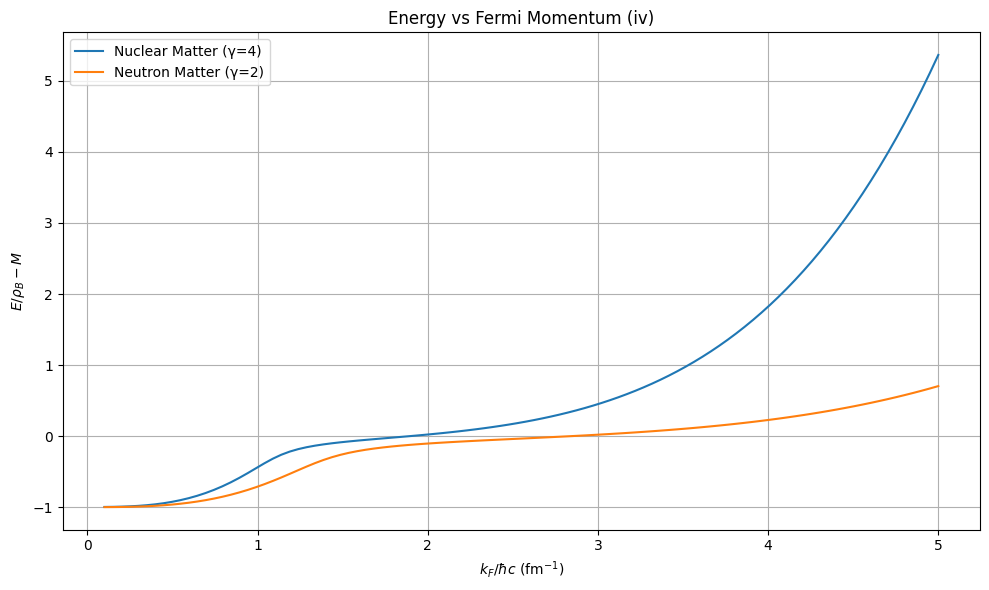

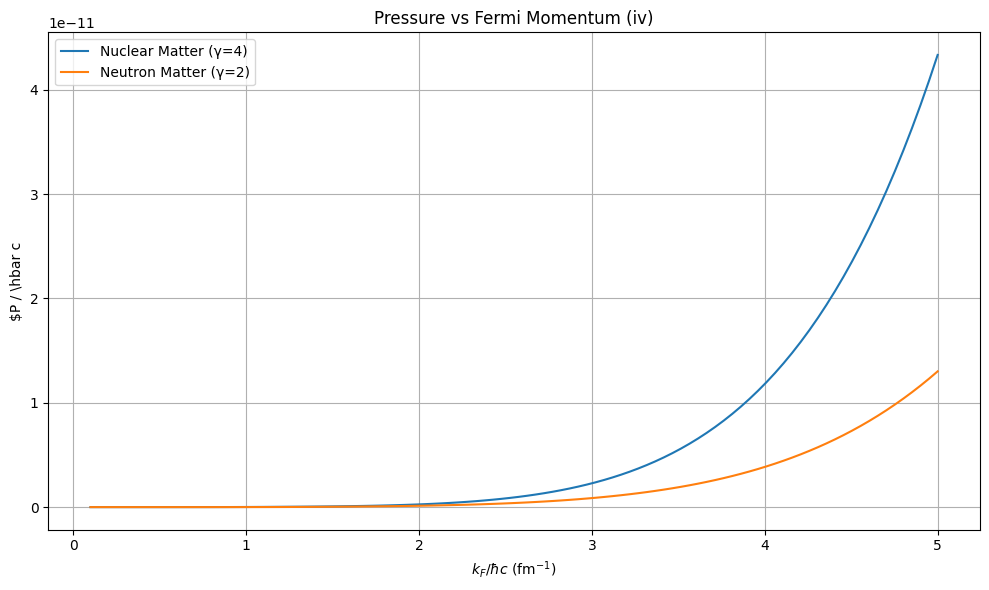

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
M = 939.0  # MeV/c^2
g_s2 = 267.1
m_s = M
ħc = 197.3269  # MeV·fm
kF_vals = np.linspace(0.1, 5, 100) * ħc
c = 3e8

def M_star_iterative(M_star, kF, gamma, tol=1e-2):
    A = (g_s2 / m_s**2) * (gamma / (4 * np.pi**2))
    Ef = ((kF ** 2 + M_star ** 2)**(1/2))
    f = M_star - M + (A * M_star * (kF * Ef - M_star**2 * np.log((kF + Ef)/M_star)))
    return f

def solve_M_star_iterative(M0,M1,kF, gamma, tol = 1e-4):
    if M_star_iterative(M0,kF,gamma) * M_star_iterative(M1,kF,gamma) > 0:
        return None

    else :
        while abs(M0 - M1) > tol:
            M_mid = (M0 + M1)/2
            if M_star_iterative(M_mid,kF,gamma) * M_star_iterative(M0,kF,gamma) < 0 :
                M1 = M_mid
            else :
                M0 = M_mid
        return (M0 + M1)/2  
    

# Solve for both nuclear (gamma=4) and neutron (gamma=2) matter
M_star_nuclear = [solve_M_star_iterative(1e-4,1000,kF, gamma=4) for kF in kF_vals]
M_star_neutron = [solve_M_star_iterative(1e-4,1000,kF, gamma=2) for kF in kF_vals]

# Plotting
plt.plot(kF_vals / ħc, np.array(M_star_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(M_star_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$M^* / M$')
plt.title('Effective Mass Ratio vs Fermi Momentum')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter')

'''Part b'''

g_s2 = 267.1
g_v2 = 195.9
m_v = m_s = M = 939

def rho(kF, gamma):
    return (gamma / (6 * np.pi**2)) * kF**3

def energy_density(kF, M_star, gamma):

    EF = np.sqrt(kF**2 + M_star**2)
    rho_B = rho(kF, gamma)

    term1 = (g_v2 / (2 * m_v**2)) * rho_B**2
    term2 = (m_s**2 / (2 * g_s2)) * (M - M_star)**2
    term3 = (gamma / (4 * np.pi)**2) * (kF * EF * (kF**2 + EF**2) - M_star**4 * np.log((kF + EF) / M_star))

    return term1 + term2 + term3

f_nuclear = []
f_neutron = []

for i in range(len(kF_vals)):
    kf, M_nuclear, M_neutron = kF_vals[i], M_star_nuclear[i], M_star_neutron[i]
    f_nuclear.append([energy_density(kf, M_nuclear, gamma = 4)/rho(kf, M_nuclear) - M_nuclear])
    f_neutron.append([energy_density(kf, M_neutron, gamma = 2)/rho(kf, M_neutron) - M_neutron])


plt.figure(figsize=(10, 6))
plt.plot(kF_vals / ħc, np.array(f_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(f_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$E / \rho_B - M$')
plt.title('Energy vs Fermi Momentum')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter(2)')

'''Part-c'''

  
def pressure(kF, M_star,gamma):
    EF = np.sqrt(kF**2 + M_star**2)
    rho_B = rho(kF, gamma)

    term1 = (g_v2 / (2 * m_v**2)) * rho_B**2
    term2 = (m_s**2 / (2 * g_s2)) * (M - M_star)**2
    term3 = (1 / (2 * np.pi)**2) * (kF * EF * (2 * kF**2 - 3 * M_star**2) 
                                    + 3 * M_star**4 * np.log((kF + EF) / M_star))

    return term1 + term2 + term3

p_nuclear = []
p_neutron = []

for i in range(len(kF_vals)):
    kf, M_nuclear, M_neutron = kF_vals[i], M_star_nuclear[i], M_star_neutron[i]
    p_nuclear.append([pressure(kf, M_nuclear, gamma = 4) / (ħc *c*c)])
    p_neutron.append([pressure(kf, M_neutron, gamma = 2)/ (ħc *c*c)])


plt.figure(figsize=(10, 6))
plt.plot(kF_vals / ħc, np.array(p_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(p_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$P / \hbar c')
plt.title('Pressure vs Fermi Momentum')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter(3)')

# Constants
M = 939.0  # MeV/c^2
g_s2 = 267.1
m_s = 500
m_v = 782
ħc = 197.3269  # MeV·fm
kF_vals = np.linspace(0.1, 5, 100) * ħc
c = 3e8

def M_star_iterative(M_star, kF, gamma, tol=1e-2):
    A = (g_s2 / m_s**2) * (gamma / (4 * np.pi**2))
    Ef = ((kF ** 2 + M_star ** 2)**(1/2))
    f = M_star - M + (A * M_star * (kF * Ef - M_star**2 * np.log((kF + Ef)/M_star)))
    return f

def solve_M_star_iterative(M0,M1,kF, gamma, tol = 1e-4):
    if M_star_iterative(M0,kF,gamma) * M_star_iterative(M1,kF,gamma) > 0:
        return None

    else :
        while abs(M0 - M1) > tol:
            M_mid = (M0 + M1)/2
            if M_star_iterative(M_mid,kF,gamma) * M_star_iterative(M0,kF,gamma) < 0 :
                M1 = M_mid
            else :
                M0 = M_mid
        return (M0 + M1)/2  
    

# Solve for both nuclear (gamma=4) and neutron (gamma=2) matter
M_star_nuclear = [solve_M_star_iterative(1e-4,1000,kF, gamma=4) for kF in kF_vals]
M_star_neutron = [solve_M_star_iterative(1e-4,1000,kF, gamma=2) for kF in kF_vals]

# Plotting
plt.plot(kF_vals / ħc, np.array(M_star_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(M_star_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$M^* / M$')
plt.title('Effective Mass Ratio vs Fermi Momentum (iv)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter')

'''Part b'''

g_s2 = 267.1
g_v2 = 195.9


def rho(kF, gamma):
    return (gamma / (6 * np.pi**2)) * kF**3

def energy_density(kF, M_star, gamma):

    EF = np.sqrt(kF**2 + M_star**2)
    rho_B = rho(kF, gamma)

    term1 = (g_v2 / (2 * m_v**2)) * rho_B**2
    term2 = (m_s**2 / (2 * g_s2)) * (M - M_star)**2
    term3 = (gamma / (4 * np.pi)**2) * (kF * EF * (kF**2 + EF**2) - M_star**4 * np.log((kF + EF) / M_star))

    return term1 + term2 + term3

f_nuclear = []
f_neutron = []

for i in range(len(kF_vals)):
    kf, M_nuclear, M_neutron = kF_vals[i], M_star_nuclear[i], M_star_neutron[i]
    f_nuclear.append([energy_density(kf, M_nuclear, gamma = 4)/rho(kf, M_nuclear) - M_nuclear])
    f_neutron.append([energy_density(kf, M_neutron, gamma = 2)/rho(kf, M_neutron) - M_neutron])


plt.figure(figsize=(10, 6))
plt.plot(kF_vals / ħc, np.array(f_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(f_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$E / \rho_B - M$')
plt.title('Energy vs Fermi Momentum (iv)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter(2)')

'''Part-c'''

  
def pressure(kF, M_star,gamma):
    EF = np.sqrt(kF**2 + M_star**2)
    rho_B = rho(kF, gamma)

    term1 = (g_v2 / (2 * m_v**2)) * rho_B**2
    term2 = (m_s**2 / (2 * g_s2)) * (M - M_star)**2
    term3 = (1 / (2 * np.pi)**2) * (kF * EF * (2 * kF**2 - 3 * M_star**2) 
                                    + 3 * M_star**4 * np.log((kF + EF) / M_star))

    return term1 + term2 + term3

p_nuclear = []
p_neutron = []

for i in range(len(kF_vals)):
    kf, M_nuclear, M_neutron = kF_vals[i], M_star_nuclear[i], M_star_neutron[i]
    p_nuclear.append([pressure(kf, M_nuclear, gamma = 4) / (ħc *c*c)])
    p_neutron.append([pressure(kf, M_neutron, gamma = 2)/ (ħc *c*c)])


plt.figure(figsize=(10, 6))
plt.plot(kF_vals / ħc, np.array(p_nuclear) / M, label='Nuclear Matter (γ=4)')
plt.plot(kF_vals / ħc, np.array(p_neutron) / M, label='Neutron Matter (γ=2)')
plt.xlabel(r'$k_F / \hbar c$ (fm$^{-1}$)')
plt.ylabel(r'$P / \hbar c')
plt.title('Pressure vs Fermi Momentum (iv)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('Nuclear_matter(3)')
